In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC


In [4]:
import sys
import os

# Add the project root directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Now you can import from src
from src.preprocessing import get_preprocessed_data

In [ ]:

# Get preprocessed data
DATA_PATH = "../data/creditcard_2023.csv"
X_train, X_test, y_train, y_test, scaler, pca = get_preprocessed_data(DATA_PATH)


In [12]:
# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [13]:
def evaluate_model(model, X_train, y_train, kfold):
    """
    Evaluate a model using cross-validation with multiple metrics
    """
    # Define scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }
    
    # Perform cross-validation for each metric
    results = {}
    for metric_name, scorer in scoring.items():
        cv_scores = cross_val_score(
            model, 
            X_train, 
            y_train, 
            cv=kfold, 
            scoring=scorer
        )
        results[metric_name] = cv_scores
    
    # Print results
    print(f"\nModel: {model.__class__.__name__}")
    print("-" * 50)
    for metric_name, scores in results.items():
        print(f"{metric_name.capitalize()}:")
        print(f"Mean: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
        print(f"Individual fold scores: {np.round(scores, 2)}")
        print("-" * 25)
    
    return results

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

In [15]:
# Evaluate all models
all_results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    all_results[name] = evaluate_model(model, X_train, y_train, kfold)



Evaluating Logistic Regression...

Model: LogisticRegression
--------------------------------------------------
Accuracy:
Mean: 0.95 (+/- 0.00)
Individual fold scores: [0.95 0.95 0.95 0.95 0.95]
-------------------------
Precision:
Mean: 0.98 (+/- 0.00)
Individual fold scores: [0.98 0.98 0.98 0.98 0.98]
-------------------------
Recall:
Mean: 0.92 (+/- 0.00)
Individual fold scores: [0.93 0.93 0.92 0.92 0.92]
-------------------------
F1:
Mean: 0.95 (+/- 0.00)
Individual fold scores: [0.95 0.95 0.95 0.95 0.95]
-------------------------

Evaluating Random Forest...

Model: RandomForestClassifier
--------------------------------------------------
Accuracy:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------
Precision:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------
Recall:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------
F1:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [

c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\xgboost\core.py:158: UserWarning: [12:40:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\xgboost\core.py:158: UserWarning: [12:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\xgboost\core.py:158: UserWarning: [12:40:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us


Model: XGBClassifier
--------------------------------------------------
Accuracy:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------
Precision:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------
Recall:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------
F1:
Mean: 1.00 (+/- 0.00)
Individual fold scores: [1. 1. 1. 1. 1.]
-------------------------


In [16]:
# Summary DataFrame of mean scores
summary = pd.DataFrame()
for model_name, results in all_results.items():
    means = {metric: scores.mean() for metric, scores in results.items()}
    summary = pd.concat([summary, pd.DataFrame(means, index=[model_name])])

print("\nSummary of all models:")
print(summary.round(3))


Summary of all models:
                     accuracy  precision  recall     f1
Logistic Regression     0.952      0.977   0.925  0.950
Random Forest           0.999      0.999   0.999  0.999
KNN                     0.990      0.981   0.998  0.990
XGBoost                 0.997      0.996   0.997  0.997


C:\Users\franc\AppData\Local\Temp\ipykernel_18456\2131050432.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=models.keys())


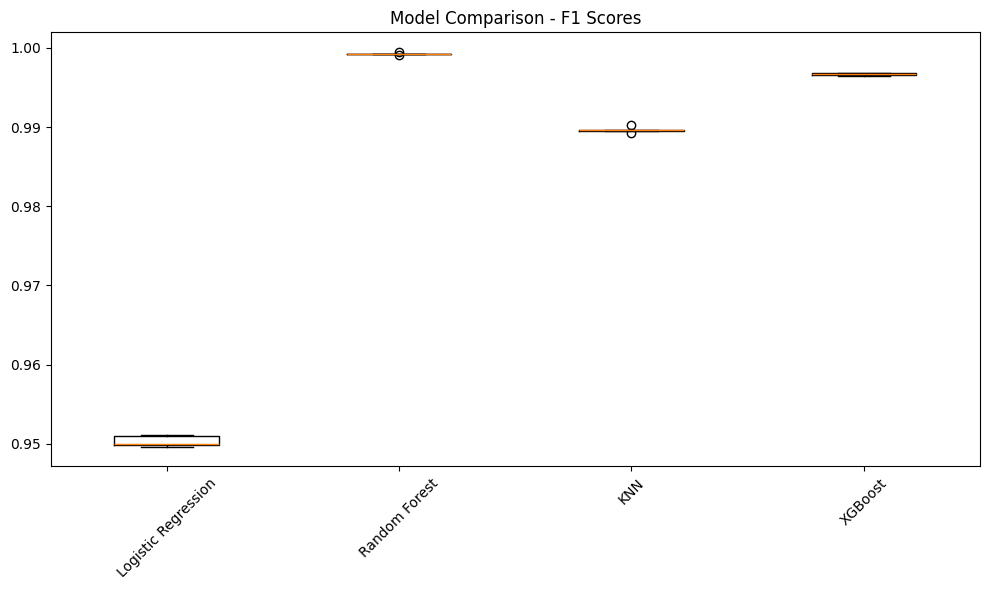

In [17]:
# Plot comparison of F1 scores
plt.figure(figsize=(10, 6))
box_data = [all_results[model]['f1'] for model in models.keys()]
plt.boxplot(box_data, labels=models.keys())
plt.title('Model Comparison - F1 Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Neural Network with Keras

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, batch_size=256, epochs=50):
        self.input_dim = input_dim
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        
    def create_model(self):
        model = Sequential([
            Dense(64, activation='relu', input_dim=self.input_dim),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            
            Dense(16, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model
    
    def fit(self, X, y):
        # Calculate class weights
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y),
            y=y
        )
        class_weight_dict = dict(zip(np.unique(y), class_weights))
        
        # Create and train model
        self.model = self.create_model()
        self.model.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            class_weight=class_weight_dict,
            verbose=0
        )
        return self
    
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)
    
    def predict_proba(self, X):
        probs = self.model.predict(X)
        return np.hstack([1-probs, probs])



In [22]:
# Add neural network to models dictionary
models['Neural Network'] = KerasClassifier(
    input_dim=X_train.shape[1],
    batch_size=256,
    epochs=50
)

# Update evaluations with neural network
print("\nEvaluating Neural Network...")
all_results['Neural Network'] = evaluate_model(models['Neural Network'], X_train, y_train, kfold)



Evaluating Neural Network...


c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_scorer.py


Model: KerasClassifier
--------------------------------------------------
Accuracy:
Mean: nan (+/- nan)
Individual fold scores: [nan nan nan nan nan]
-------------------------
Precision:
Mean: nan (+/- nan)
Individual fold scores: [nan nan nan nan nan]
-------------------------
Recall:
Mean: nan (+/- nan)
Individual fold scores: [nan nan nan nan nan]
-------------------------
F1:
Mean: nan (+/- nan)
Individual fold scores: [nan nan nan nan nan]
-------------------------


c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\franc\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\_response.py", line 199, in _get_response_values
    classes = estimator.classes_
AttributeError: 'KerasClassifier' object has no attribute 'classes_'

  warnings.warn(


In [23]:
# Update summary DataFrame
summary = pd.DataFrame()
for model_name, results in all_results.items():
    means = {metric: scores.mean() for metric, scores in results.items()}
    summary = pd.concat([summary, pd.DataFrame(means, index=[model_name])])

print("\nUpdated Summary of all models:")
print(summary.round(3))


Updated Summary of all models:
                     accuracy  precision  recall     f1
Logistic Regression     0.952      0.977   0.925  0.950
Random Forest           0.999      0.999   0.999  0.999
KNN                     0.990      0.981   0.998  0.990
XGBoost                 0.997      0.996   0.997  0.997
Neural Network            NaN        NaN     NaN    NaN


C:\Users\franc\AppData\Local\Temp\ipykernel_18456\1525133082.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=models.keys())


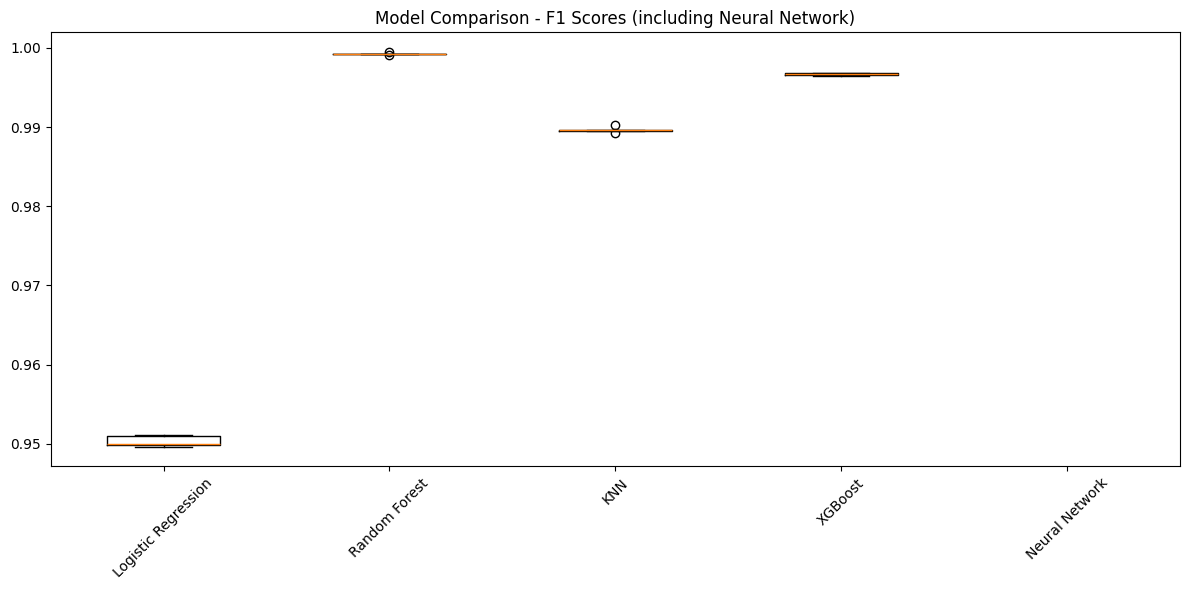

In [24]:
# Updated plot including neural network
plt.figure(figsize=(12, 6))
box_data = [all_results[model]['f1'] for model in models.keys()]
plt.boxplot(box_data, labels=models.keys())
plt.title('Model Comparison - F1 Scores (including Neural Network)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Get the model with the best F1 score
best_model_name = summary.loc[summary['f1'].idxmax()]
best_f1_score = summary.loc[summary['f1'].idxmax(), 'f1']
print(f"Best performing model: {summary['f1'].idxmax()}")
print(f"Best F1 Score: {best_f1_score:.3f}")

Best performing model: Random Forest
Best F1 Score: 0.999


In [26]:
# Get the best model from our dictionary of models
best_model = models[summary['f1'].idxmax()]

# Fit the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate and display all metrics
print("\nTest Set Performance:")
print("-" * 50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba).round(3))


Test Set Performance:
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


ROC-AUC Score: 1.0


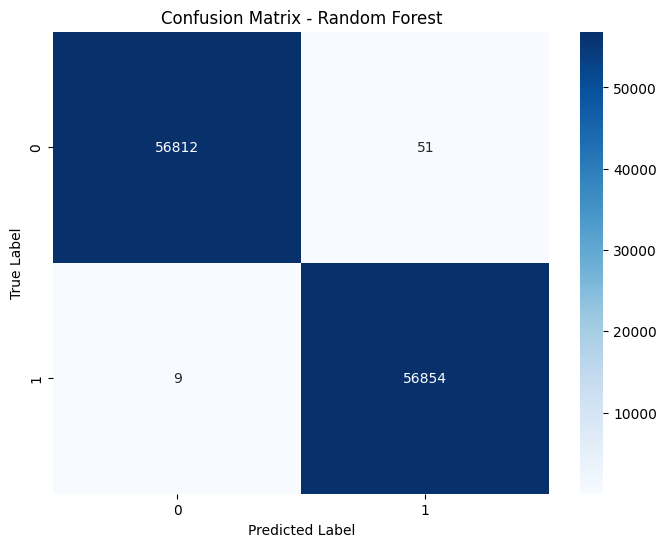

In [27]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {summary["f1"].idxmax()}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<Figure size 800x600 with 0 Axes>

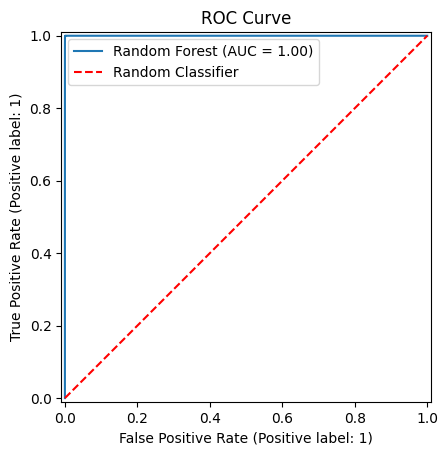

In [28]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba,
    name=summary['f1'].idxmax()
)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.legend()
plt.show()